In [215]:
# Project: Using FSH Cardiac Surgical Data to Explore and Predict Readmissions
# Author: Victor Hui

# This document aims to:
# - identify input features relevant to readmission outcome
# - standard logistic regression stratifying by readmission outcome
# - training machine learning models to predict readmission outcome

# cardiac_data_all - this is original uncleaned data
# linked_data_anon - this should be ready for analysing, comes from cleaning the other document

In [216]:
import os
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__
pd.__version__

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 100) # sets how many rows to display

'0.24.1'

'1.4.2'

In [217]:
### Loading data ###
data = pd.read_pickle("cardiac_data_anon")
data

,AGE,Sex,DOSA,DOP,PROCNO,Pcode,Race1,SMO_H,SMO_C,DB_CON,...,postop_LOS,total_LOS,BMI,AOPROC_COMMON,AOPATH_COMMON,MIPROC_COMMON,MIPATH_COMMON,TRPROC_COMMON,delta_Cr,CrCl
0,51.605749,2,1,23/02/2015,1,6169,0,0,0.0,0.0,...,5.0,5.0,35.204304,1.0,0.0,3.0,99.0,1.0,6.0,90.000000
1,40.832306,2,0,19/03/2015,1,6765,1,1,0.0,0.0,...,10.0,13.0,41.522491,1.0,1.0,3.0,1.0,1.0,5.0,90.000000
2,29.631759,2,0,16/03/2015,1,6054,1,0,0.0,0.0,...,38.0,78.0,32.744928,1.0,0.0,3.0,1.0,99.0,86.0,53.887417
3,58.004106,2,0,19/03/2015,1,6163,0,1,1.0,0.0,...,19.0,23.0,33.672766,1.0,0.0,1.0,0.0,1.0,28.0,90.000000
4,51.230663,1,0,27/03/2015,1,6006,0,1,0.0,0.0,...,5.0,12.0,28.731747,1.0,0.0,1.0,0.0,1.0,0.0,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,63.646817,2,0,06/11/2017,1,6109,0,1,0.0,4.0,...,17.0,20.0,30.757401,3.0,99.0,1.0,0.0,1.0,176.0,54.136568
3480,51.282683,1,1,10/02/2020,1,6110,0,1,0.0,0.0,...,7.0,7.0,27.160494,3.0,4.0,1.0,0.0,1.0,11.0,90.000000
3481,82.677618,1,1,06/09/2019,1,6348,0,1,0.0,0.0,...,17.0,17.0,38.302384,3.0,4.0,1.0,19.0,1.0,0.0,90.000000
3482,64.818617,2,1,06/07/2020,1,6725,0,1,0.0,0.0,...,6.0,6.0,24.221453,3.0,99.0,1.0,19.0,1.0,-1.0,67.820388


In [218]:
data.shape
list(data)

# each feature is defined as per the ANZSCTS data definitions manual
# AOPROCCOMMON, AOPATHCOMMON, MIPROCCOMMON, MIPATHCOMMON, TRPROCCOMMON are the same as their ANZSCTS data counterparts
# except their low frequency types (<50) have been counted together as its own type

(3209, 156)

['AGE',
 'Sex',
 'DOSA',
 'DOP',
 'PROCNO',
 'Pcode',
 'Race1',
 'SMO_H',
 'SMO_C',
 'DB_CON',
 'HCHOL',
 'PRECR',
 'DIAL',
 'TRANS',
 'HYT',
 'CBVD',
 'PVD',
 'LD',
 'LD_T',
 'IE_T',
 'IMSRX',
 'MI',
 'MI_T',
 'MI_W',
 'CCS',
 'ANGRXH',
 'ANGRXC',
 'CHF',
 'CHF_C',
 'NYHA',
 'SHOCK',
 'RESUS',
 'ARRT',
 'PACE',
 'MEDIN',
 'MEDNI',
 'MEDAC',
 'MEDST',
 'MED_ASP',
 'MED_CLOP',
 'MED_TICA',
 'MED_AGG',
 'MED_AGG_W',
 'MED_OTH',
 'PCS',
 'PTCA',
 'PTCA_ADM',
 'HTM',
 'WKG',
 'EF_EST',
 'LMD',
 'DISVES',
 'SURG',
 'PROC',
 'STAT',
 'CCAB',
 'DAN',
 'CVLV',
 'AOSTEN',
 'AOREG',
 'MISTEN',
 'MIREG',
 'TRSTEN',
 'TRREG',
 'AODEP',
 'COTH',
 'CT',
 'CPT',
 'AO',
 'CPB',
 'CCT',
 'PERF',
 'MIN',
 'ROBOT',
 'MINHT',
 'IABP',
 'ECMO',
 'ECMO_W',
 'VAD',
 'DRAIN_4',
 'RTT',
 'ROBL',
 'RBCUnit',
 'PlateUnit',
 'NovoUnit',
 'CryoUnit',
 'FFPUnit',
 'VENT',
 'ICU',
 'REICU',
 'REINT',
 'ROVD',
 'ROGO',
 'ROSI',
 'RDTI',
 'ROPA',
 'ROOC',
 'RONC',
 'NRF',
 'HAEMOFIL',
 'POSTCR',
 'POMI',
 'POCS',
 'PO

In [219]:
### Missing Data ###

excluded = 0

data.isnull().sum().sort_values(ascending=False)[data.isnull().sum().sort_values(ascending=False) > 0]

MINHT     913
POSTHG    573
PERF      388
CCT       388
VENT        1
dtype: int64

In [220]:
# patients with missing PERF and CCT should = 0 to indicate "No CPB used"
data['PERF'] = data['PERF'].fillna(0)
data['CCT'] = data['CCT'].fillna(0)

In [221]:
# patients with missing blood gas data

# data['EF_EST'].value_counts(dropna=False)
data['VENT'].isna().sum()

# excluded = excluded + 150 # (must be 2 overlap)
excluded = excluded + 1

# data = data[data['EF_EST'] > 0]
data = data[data['VENT'] >= 0] # some values are 0

1

In [222]:
excluded # number of patients missing

1

In [223]:
# Remove MINHT, POSTHG columns, too many missing
data = data.drop('MINHT', axis = 1)
data = data.drop('POSTHG', axis = 1)

In [224]:
# Double check
data.shape
data.isnull().sum().sort_values(ascending=False)[data.isnull().sum().sort_values(ascending=False) > 0]
# all are present

(3208, 154)

Series([], dtype: int64)

In [225]:
### Creating outcome variable ###

# excluding in-hospital mortality
# readmission prediction excludes in-hospital mortality - put False
# 30 day mortality and NRF prediction includes in-hospital mortality - put True

inhospmort = True
# inhospmort = False

if(inhospmort == False):
    data['DISCHAR'].value_counts(dropna=False)
    data = data[data['DISCHAR'] != 5]
    
    # 55 patients excluded
    excluded = 55 + excluded
    
    # to double check
    data['DISCHAR'].value_counts()
else:
    # remove discharge destination as column because we are using inhospmort
    data = data.drop('DISCHAR', axis = 1)

In [226]:
# cond1 is post discharge mortality is true OR 30d mort is true
# cond2 is readmission is true but only if for cardiac surgical reason
cond1 = (data['MORTPD'] == True) | (data['MORT30'] == True) 
cond2 = (data['READ'] == True) # & (data['READOTHNC'] == False) # can exclude readmission for other reasons, but similar result unfortunately

# cond3 = (data['MORTPD'] == False) & (data['MORT30'] == False)

In [227]:
# outcome = READ or MORTPD
data.loc[cond1 | cond2, 'OUTCOME'] = 1
# data.loc[cond3 | cond4, 'OUTCOME'] = 0
data['OUTCOME'] = data['OUTCOME'].fillna(0) # this works better, doesn't require complex logic

data['OUTCOME'].value_counts()

0.0    2768
1.0     440
Name: OUTCOME, dtype: int64

In [228]:
data['OUTCOME'].value_counts()
print("The incidence of outcome is: {}".format(
    data['OUTCOME'].value_counts()[1] /
    (data['OUTCOME'].value_counts()[0] + data['OUTCOME'].value_counts()[1])))

data['READ'].value_counts()
print("The incidence of outcome is: {}".format(
    data['READ'].value_counts()[1] /
    (data['READ'].value_counts()[0] + data['READ'].value_counts()[1])))

data['MORTPD'].value_counts()
print("The incidence of outcome is: {}".format(
    data['MORTPD'].value_counts()[1] /
    (data['MORTPD'].value_counts()[0] + data['MORTPD'].value_counts()[1])))

data['MORT30'].value_counts()

0.0    2768
1.0     440
Name: OUTCOME, dtype: int64

The incidence of outcome is: 0.1371571072319202


0.0    2824
1.0     384
Name: READ, dtype: int64

The incidence of outcome is: 0.11970074812967581


0.0    3199
1.0       9
Name: MORTPD, dtype: int64

The incidence of outcome is: 0.002805486284289277


0.0    3151
1.0      57
Name: MORT30, dtype: int64

In [229]:
# https://immi.homeaffairs.gov.au/visas/working-in-australia/skill-occupation-list/regional-postcodes
# Using this to determine which postcodes are regional
data['REGIONAL'] = 1
data.loc[(data['Pcode'] >= 6000) & (data['Pcode'] <= 6038), 'REGIONAL'] = 0
data.loc[(data['Pcode'] >= 6050) & (data['Pcode'] <= 6083), 'REGIONAL'] = 0
data.loc[(data['Pcode'] >= 6090) & (data['Pcode'] <= 6182), 'REGIONAL'] = 0
data.loc[(data['Pcode'] >= 6208) & (data['Pcode'] <= 6211), 'REGIONAL'] = 0
data.loc[(data['Pcode'] >= 6556) & (data['Pcode'] <= 6558), 'REGIONAL'] = 0
data.loc[(data['Pcode'] == 6214), 'REGIONAL'] = 0

In [230]:
data['REGIONAL'].value_counts() # 490 regional patients

0    2256
1     952
Name: REGIONAL, dtype: int64

In [231]:
# Remove these columns
# data = data.drop('MORTPD', axis=1)
# data = data.drop('READ', axis=1)
# data = data.drop('MORT30', axis=1)
# data = data.drop('DISCHAR', axis = 1)
data = data.drop('Pcode', axis=1)

# Remove other outcome columns
readmission_extra_columns = [
    'READAC', 'READAR', 'READCHF', 'READVD', 'READPE', 'READCT', 'READPLE',
    'READOTHC', 'READDSI', 'READIC', 'READRC', 'READMI', 'READRA', 'READOTHNC'
]
data = data.drop(readmission_extra_columns, axis=1)

In [232]:
list(data)

['AGE',
 'Sex',
 'DOSA',
 'DOP',
 'PROCNO',
 'Race1',
 'SMO_H',
 'SMO_C',
 'DB_CON',
 'HCHOL',
 'PRECR',
 'DIAL',
 'TRANS',
 'HYT',
 'CBVD',
 'PVD',
 'LD',
 'LD_T',
 'IE_T',
 'IMSRX',
 'MI',
 'MI_T',
 'MI_W',
 'CCS',
 'ANGRXH',
 'ANGRXC',
 'CHF',
 'CHF_C',
 'NYHA',
 'SHOCK',
 'RESUS',
 'ARRT',
 'PACE',
 'MEDIN',
 'MEDNI',
 'MEDAC',
 'MEDST',
 'MED_ASP',
 'MED_CLOP',
 'MED_TICA',
 'MED_AGG',
 'MED_AGG_W',
 'MED_OTH',
 'PCS',
 'PTCA',
 'PTCA_ADM',
 'HTM',
 'WKG',
 'EF_EST',
 'LMD',
 'DISVES',
 'SURG',
 'PROC',
 'STAT',
 'CCAB',
 'DAN',
 'CVLV',
 'AOSTEN',
 'AOREG',
 'MISTEN',
 'MIREG',
 'TRSTEN',
 'TRREG',
 'AODEP',
 'COTH',
 'CT',
 'CPT',
 'AO',
 'CPB',
 'CCT',
 'PERF',
 'MIN',
 'ROBOT',
 'IABP',
 'ECMO',
 'ECMO_W',
 'VAD',
 'DRAIN_4',
 'RTT',
 'ROBL',
 'RBCUnit',
 'PlateUnit',
 'NovoUnit',
 'CryoUnit',
 'FFPUnit',
 'VENT',
 'ICU',
 'REICU',
 'REINT',
 'ROVD',
 'ROGO',
 'ROSI',
 'RDTI',
 'ROPA',
 'ROOC',
 'RONC',
 'NRF',
 'HAEMOFIL',
 'POSTCR',
 'POMI',
 'POCS',
 'CIUSE',
 'IULOWOUT',
 

In [233]:
feature_select = [
    'AGE', 'Sex', 'DOSA', 'PROCNO', 'Race1', 'SMO_H', 'SMO_C', 'DB_CON',
    'HCHOL', 'PRECR', 'DIAL', 'TRANS', 'HYT', 'CBVD', 'PVD', 'LD', 'LD_T',
    'IE_T', 'IMSRX', 'MI', 'MI_T', 'MI_W', 'CCS', 'ANGRXH', 'ANGRXC', 'CHF',
    'CHF_C', 'NYHA', 'SHOCK', 'RESUS', 'ARRT', 'PACE', 'MEDIN', 'MEDNI',
    'MEDAC', 'MEDST', 'MED_ASP', 'MED_CLOP', 'MED_TICA', 'MED_AGG',
    'MED_AGG_W', 'MED_OTH', 'PCS', 'PTCA', 'PTCA_ADM', 'HTM', 'WKG', 'EF_EST',
    'LMD', 'DISVES', 'SURG', 'PROC', 'STAT', 'CCAB', 'DAN', 'CVLV', 'AOSTEN',
    'AOREG', 'MISTEN', 'MIREG', 'TRSTEN', 'TRREG', 'AODEP', 'COTH', 'CT',
    'CPT', 'AO', 'CPB', 'CCT', 'PERF', 'MIN', 'ROBOT', 'IABP', 'ECMO',
    'ECMO_W', 'VAD', 'REGIONAL', 'CrCl', 'BMI', 'AOPROC_COMMON',
    'AOPATH_COMMON', 'MIPROC_COMMON', 'MIPATH_COMMON', 'TRPROC_COMMON',
    'OUTCOME', 'MORT30', 'NRF'
]

if(inhospmort == True):
    data = data[feature_select] # this selects preoperative variables only for MORT30 predictions

data.shape

(3208, 87)

In [234]:
# ### Manual feature selection ###

# feature_select = [

#     # Euroscore II related
#     'AGE',
#     'Sex',
#     #     'PRECR', # preoperative creatinine don't need - we have CrCl
#     'CrCl',
#     'DIAL',
#     'PVD',  # peripheral vascular disease
#     'PCS',  # this indicates redo surgery
#     'LD_T',  # lung disease
#     'SHOCK',
#     'RESUS',  # shock or resus patient
#     'IE_T',  # infective endocarditis
#     'STAT',  # surgical urgency
#     'DB_CON',  # diabetes
#     'NYHA',
#     'CCS',
#     'EF_EST',  # LV EF estimation
#     'MI_W',  # MI how long ago
#     # type of procedure
#     'AOPROC_COMMON',
#     'MIPROC_COMMON',
#     'TRPROC_COMMON',
#     'AO',
#     # pHTN not included

#     # Other ANZSCTS
#     'BMI',
#     'SURG',
#     'PROC',  # surgeon and proceduralist listed
#     'SMO_C',  # current smoker
# #     'CCT','PERF',  # XClamp and perfusion times - technically not preoperative variables
#     'CCAB',  # CABG
#     'CVLV',  # valvular procedure
#     'COTH',  # other cardiac procedure
#     'REGIONAL',  # postcode related
#     'Race1',  # ethnicity

#     # Post operative outcomes
# #     'VENT',  # duration of MV
# #     'ICU',  # ICU LOS
# #     'postop_LOS',
# #     'total_LOS',
# #     'REICU',  # readmitted to ICU
# #     'REINT',  # reintubated
# #     'RTT',  # return to theatre
# #     'RBCUnit',
# #     'PlateUnit',
# #     'NovoUnit',
# #     'CryoUnit',
# #     'FFPUnit',
# #     'NRF',  # new renal insufficiency
# #     'HAEMOFIL',  # haemofiltration
# #     'POSTCR',
# #     'delta_Cr',
# #     'POMI',  # post op MI
# #     'POCS',  # post op cardiogenic shock
# #     'VENT_P',  # prolonged ventilation
# #     'HB',  # heart block req PPM
# #     'BA',  # new brady req PPM
# #     'AFIB',  # new AF
# #     'CVA_P',  # stroke permanent
# #     'CVA_T',  # stroke transient
# #     'COMA',  # new coma
# #     'PUEMB',  # pulmonary embolus
# #     'PUPNU',  # pneumonia
# #     'INFDS',  # deep sternal wound infection
# #     'SWI',  # superficial access wound infection
# #     'DOWI',  # donor site deep wound infection
# #     'INFTH',  # deep access wound infection of parasternal site
# #     'INFSP',  # septicaemia
# #     'ACOAG',  # anticoagulant complications
# #     'MSF',  # multi system failure
# #     'NAODS',  # dissection
# #     'GIT',  # GIT complications
# #     'DISCHAR',  # discharge destination

#     # Outcomes to be removed later
#     'OUTCOME',
#     'MORT30'
# ]

# if(inhospmort == True):
#     data = data[feature_select] # this selects preoperative variables only for MORT30 predictions

In [235]:
data.isnull().sum().sort_values(ascending=False)[data.isnull().sum().sort_values(ascending=False) > 0]
data.shape

Series([], dtype: int64)

(3208, 87)

In [236]:
### Data Preparation ###

# Continuous variables (these need StandardScaler)
# Ordinal variables (these need MinMaxScaler)
# Binary variables (these need nothing)
# Categorical variables (these need hot encoding)

In [237]:
# Temporarily remove EF_EST missing data
#data['EF_EST'].value_counts(dropna=False)
#data = data[data['EF_EST'] > 0]

In [238]:
### Reading text files from feature_select folder ###

with open('feature_num_attribs.txt') as f:
    num_attribs = f.read().splitlines()
    
with open('feature_cat_attribs.txt') as f:
    cat_attribs = f.read().splitlines()
    
with open('feature_ord_attribs.txt') as f:
    ord_attribs = f.read().splitlines()

In [239]:
num_select = []
ord_select = []
cat_select = []
bin_select = []

for i in range(0,len(data.columns)):
    if data.columns[i] in num_attribs:
        num_select.append(data.columns[i])
    elif data.columns[i] in ord_attribs:        
        ord_select.append(data.columns[i])
    elif data.columns[i] in cat_attribs:
        cat_select.append(data.columns[i])
    else: # everything else is binary
        bin_select.append(data.columns[i])
        
bin_select.remove('OUTCOME') # remove outcome from bin_select list
bin_select.remove('MORT30') # remove outcome from bin_select list

# if no feature selection
if(inhospmort==False):
    bin_select.remove('MORTPD')
    bin_select.remove('READ')
    bin_select.remove('DOP')

if(inhospmort==True):
    bin_select.remove('NRF')

# bin_select.remove('NRF')

In [240]:
cat_select
ord_select
num_select
# everything else is binary

['Sex',
 'SURG',
 'PROC',
 'AOPROC_COMMON',
 'AOPATH_COMMON',
 'MIPROC_COMMON',
 'MIPATH_COMMON',
 'TRPROC_COMMON']

['DB_CON',
 'LD_T',
 'IE_T',
 'MI_T',
 'MI_W',
 'CCS',
 'NYHA',
 'MED_AGG_W',
 'EF_EST',
 'STAT',
 'DAN',
 'ECMO_W']

['AGE',
 'PROCNO',
 'PRECR',
 'HTM',
 'WKG',
 'DISVES',
 'CCT',
 'PERF',
 'CrCl',
 'BMI']

In [241]:
### Comparison Tables ###

import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [242]:
# ### Data Visualisation ###

# scatter plot
from pandas.plotting import scatter_matrix
# attributes = ["OUTCOME", "ICU"]
# scatter_matrix(data[attributes], figsize=(12, 8))
# data.hist(column='VENT', by='OUTCOME')

In [243]:
# Correlation for numerical features
data[num_select + ['OUTCOME']].corr()['OUTCOME'].sort_values(ascending=False)

OUTCOME    1.000000
PERF       0.080538
CCT        0.065133
PRECR      0.047558
AGE       -0.001583
BMI       -0.003845
PROCNO    -0.006112
WKG       -0.016131
DISVES    -0.016811
HTM       -0.024987
CrCl      -0.063328
Name: OUTCOME, dtype: float64

In [244]:
# Correlation for ordinal features
data[ord_select + ['OUTCOME']].corr()['OUTCOME'].sort_values(ascending=False)

OUTCOME      1.000000
ECMO_W       0.117200
STAT         0.060127
LD_T         0.041006
DB_CON       0.038610
EF_EST       0.027363
MED_AGG_W    0.017003
NYHA         0.014884
IE_T         0.011968
MI_T         0.010875
MI_W         0.004508
CCS          0.000015
DAN         -0.035440
Name: OUTCOME, dtype: float64

In [245]:
# if feature selection

if(inhospmort==True):
    X = data.drop(['OUTCOME', 'MORT30', 'NRF'], axis = 1)
    y = data['MORT30'].astype(int)

if(inhospmort==False):
    X = data.drop(['OUTCOME', 'MORT30', 'READ', 'MORTPD', 'DOP'], axis = 1)
    y = data['OUTCOME'].astype(int)
    
X.shape #
y.sum()
y.sum()/len(y) # = % of positive outcomes

(3208, 84)

57

0.017768079800498753

In [246]:
### Create the test set first ###
from sklearn.model_selection import train_test_split

# Splitting training and testing set, stratify by outcome to ensure equal numbers of outcome in train/test
# Also make sure to shuffle as patients are chronological order without it
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

In [247]:
# Univariate Comparisons

# feature_selection = True
feature_selection = False
# outcome = ?
# yes_data = data[data[outcome] == 1]
# no_data = data[data[outcome] == 0]
yes_data = X_train[y_train == 1]
no_data = X_train[y_train == 0]


num_signi = []

for i in range(0, len(num_select) - 1):
    p_val = stats.mannwhitneyu(yes_data[num_select[i]],
                               no_data[num_select[i]],
                               alternative='two-sided').pvalue
    print('Feature: {}, p-value {}'.format(num_select[i], p_val))

    if (p_val < 0.1):
        num_signi.append(num_select[i])

# stats.mannwhitneyu(yes_data[variable], no_data[variable], alternative='two-sided')

if (feature_selection == True):
    num_select = num_signi
num_signi

Feature: AGE, p-value 0.9640409816825114
Feature: PROCNO, p-value 0.17057140255439063
Feature: PRECR, p-value 0.0001180154604784491
Feature: HTM, p-value 0.111755689927961
Feature: WKG, p-value 0.07284043368932368
Feature: DISVES, p-value 0.6623769464199586
Feature: CCT, p-value 0.03561288718804459
Feature: PERF, p-value 0.0005943147258437583
Feature: CrCl, p-value 1.4622175103767586e-07


['PRECR', 'WKG', 'CCT', 'PERF', 'CrCl']

In [248]:
# Chi Sq test for binary features
from sklearn.feature_selection import chi2
bin_signi = []

for i in range(0, len(bin_select)):
    bin_array = chi2(X_train[bin_select[i:i+1]], y_train)
    print('Feature: {}, Chi2 stat {}, p-value {}'.format(bin_select[i], bin_array[0], bin_array[1]))
    if(bin_array[1] < 0.1):
        bin_signi.append(bin_select[i])
        
if (feature_selection == True):
    bin_select = bin_signi
        
bin_signi # this represents p < 0.1

Feature: DOSA, Chi2 stat [4.70272501], p-value [0.03011483]
Feature: Race1, Chi2 stat [4.76742884], p-value [0.02900311]
Feature: SMO_H, Chi2 stat [4.02545037], p-value [0.04481865]
Feature: SMO_C, Chi2 stat [2.69661031], p-value [0.10056184]
Feature: HCHOL, Chi2 stat [4.19525975], p-value [0.04053714]
Feature: DIAL, Chi2 stat [21.89384448], p-value [2.88156766e-06]
Feature: TRANS, Chi2 stat [5.14018156], p-value [0.0233782]
Feature: HYT, Chi2 stat [0.64958279], p-value [0.42026188]
Feature: CBVD, Chi2 stat [1.59117999], p-value [0.20715763]
Feature: PVD, Chi2 stat [3.01564671], p-value [0.08246456]
Feature: LD, Chi2 stat [0.04306456], p-value [0.83560375]
Feature: IMSRX, Chi2 stat [6.93184243], p-value [0.00846744]
Feature: MI, Chi2 stat [0.01579639], p-value [0.8999823]
Feature: ANGRXH, Chi2 stat [0.27745197], p-value [0.59837617]
Feature: ANGRXC, Chi2 stat [0.04006871], p-value [0.8413463]
Feature: CHF, Chi2 stat [3.2405579], p-value [0.07183617]
Feature: CHF_C, Chi2 stat [8.4511890

['DOSA',
 'Race1',
 'SMO_H',
 'HCHOL',
 'DIAL',
 'TRANS',
 'PVD',
 'IMSRX',
 'CHF',
 'CHF_C',
 'SHOCK',
 'RESUS',
 'ARRT',
 'MEDIN',
 'MEDST',
 'PCS',
 'CVLV',
 'AOREG',
 'MISTEN',
 'MIREG',
 'TRSTEN',
 'TRREG',
 'AODEP',
 'AO',
 'IABP',
 'ECMO',
 'REGIONAL']

In [249]:
# Chi sq test for ordinal features

ord_signi = []

for i in range(0, len(ord_select)):
    ord_array = chi2(X_train[ord_select[i:i+1]], y_train)
    print('Feature: {}, Chi2 stat {}, p-value {}'.format(ord_select[i], ord_array[0], ord_array[1]))
    if(ord_array[1] < 0.1):
        ord_signi.append(ord_select[i])
        
if (feature_selection == True):
    ord_select = ord_signi
        
ord_signi # this represents p < 0.1

Feature: DB_CON, Chi2 stat [7.16278279], p-value [0.00744316]
Feature: LD_T, Chi2 stat [0.01783361], p-value [0.89376432]
Feature: IE_T, Chi2 stat [0.47215929], p-value [0.49199547]
Feature: MI_T, Chi2 stat [0.0074775], p-value [0.93109079]
Feature: MI_W, Chi2 stat [0.94121064], p-value [0.33196669]
Feature: CCS, Chi2 stat [1.19765576], p-value [0.27379072]
Feature: NYHA, Chi2 stat [1.83479239], p-value [0.17556254]
Feature: MED_AGG_W, Chi2 stat [1.18650794], p-value [0.27603508]
Feature: EF_EST, Chi2 stat [2.41393148], p-value [0.12026]
Feature: STAT, Chi2 stat [6.07409259], p-value [0.01371788]
Feature: DAN, Chi2 stat [2.45465249], p-value [0.1171771]
Feature: ECMO_W, Chi2 stat [132.57770513], p-value [1.11842212e-30]


['DB_CON', 'STAT', 'ECMO_W']

In [250]:
# Feature Selection based on p values

if (feature_selection == True):
    X_train = X_train[num_signi+bin_signi+ord_signi+cat_select] # selects features with low p values
    X_test = X_test[num_signi+bin_signi+ord_signi+cat_select] # selects features with low p values

In [251]:
### Imputation (missing values) ###
### Hot encoding categorical values ###
# Aim to impute median values for missing values and feature scaling

In [252]:
# Pipeline for numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")
     ),  # manages missing data with SimpleImputer with median values
    ('scaler', StandardScaler()),  # Standard Scaling for numerical continuous attributes
])

ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")
     ),  # manages missing data with SimpleImputer with median values
    ('scaler', MinMaxScaler()),  # MinMax 0-1 scaling for ordinal values
])

bin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")) # binary values don't need scaling
])

cat_encoder = OneHotEncoder(handle_unknown='ignore') # categorical variables need hot encoding

In [253]:
# Pipeline for numerical, ordinal and binary and categorical using ColumnTransformer

from sklearn.compose import ColumnTransformer

# use full_pipeline or select_pipeline here
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_select),
    ("ord", ord_pipeline, ord_select),
    ("bin", bin_pipeline, bin_select),
    ("cat", cat_encoder, cat_select)
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [254]:
X_train.shape
X_train_prepared.shape

(2566, 84)

(2566, 116)

In [255]:
# Oversampling THEN feature selection

# 1. X_train - unscaled, full number of features
# 2. X_train_prepared - scaled, full number of features
# 3. X_train_smote (smotenc) - scaled, oversampled, full number of features
# 4. X_train_rfe - scaled, oversampled, selected features

# Models that need SMOTE oversampling will benefit from RFE
# Random Forests does automatic feature selection, does not need SMOTE either

In [256]:
### Oversampling ###

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

# # Works out indices of the attributes listed # for SMOTENC
# # use cat_select here
# cols_index = [data.columns.get_loc(col) for col in (cat_attribs)]
# cols_index.sort()
# cols_index = cols_index+list(range(135,167)) # 167,201 OR if select- use some other numbers

# # Run SMOTENC
# smotenc = SMOTENC(sampling_strategy='minority', random_state = 42 , categorical_features = cols_index)
# X_train_smotenc, y_train_smotenc = smotenc.fit_sample(X_train_prepared, y_train)

# Normal SMOTE
smote = SMOTE(sampling_strategy='minority', random_state = 42 )
X_train_smote, y_train_smote = smote.fit_sample(X_train_prepared, y_train)

In [257]:
# ### Feature Selection ###

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # CV to search for number of features
# rfecv = RFECV(
#     estimator=RandomForestClassifier(random_state=42),
#     min_features_to_select=5,
#     step=5,
#     n_jobs=-1,
#     scoring="f1",
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# )

# X_train_rfe = rfecv.fit_transform(X_train_smote, y_train_smote)
# X_train_rfe.shape
# X_test_rfe = rfecv.transform(X_test_prepared)
# X_test_rfe.shape

# # No cross validation of number of features

# # rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = None) #  (None = will just half number of features)
# # X_train_rfe = rfe.fit_transform(X_train_smote, y_train_smote)
# # X_test_rfe = rfe.transform(X_test_prepared)

In [258]:
# # Check some features have disappeared
# X_train.shape
# X_train_prepared.shape

# X_train_smote.shape
# X_train_smotenc.shape

# X_train_rfe.shape

# X_test.shape
# X_test_prepared.shape
# X_test_rfe.shape

In [259]:
# # Put True if you want RFE
# RFE = False
# # RFE = True

# # RFE SMOTE
# if(RFE==True):
#     X_train_smote = X_train_rfe
#     X_train_prepared = rfecv.transform(X_train_prepared)
#     X_test_prepared = X_test_rfe

# # If True, SMOTE will have RFE even if it doesn't say it does
# # If False, below LogReg / XGBoost / ANN will all use normal SMOTE (without RFE)

In [260]:
# # no RFE has 182 features
# # RFE has fewer features

# X_train_smote.shape
# X_train_prepared.shape
# X_test_prepared.shape

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [262]:
# Logistic Regression

# Defining the parameters grid:
# values of C the GridSearchCV will go over

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ["l1", "l2"],
    'class_weight': [None, "balanced"]
}

log_reg = LogisticRegression(solver="liblinear", max_iter=200)

# can try normal X_train_prepared or X_train_smote/smotenc
log_grid_search = GridSearchCV(log_reg, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
log_grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters: {}".format(log_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(log_grid_search.best_score_))
print("Best estimator:\n{}".format(log_grid_search.best_estimator_))

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=200, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.9558
Best estimator:
LogisticRegression(C=1, max_iter=200, solver='liblinear')


In [263]:
y_train_pred = (log_grid_search.predict(X_train_prepared))
confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred ,target_names=["no", "yes"]))
roc_auc_score(y_train, log_grid_search.predict_proba(X_train_prepared)[:, 1])

array([[2263,  257],
       [   2,   44]], dtype=int64)

              precision    recall  f1-score   support

          no       1.00      0.90      0.95      2520
         yes       0.15      0.96      0.25        46

    accuracy                           0.90      2566
   macro avg       0.57      0.93      0.60      2566
weighted avg       0.98      0.90      0.93      2566



0.9623706004140786

In [264]:
y_test_pred = (log_grid_search.predict(X_test_prepared))
confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred ,target_names=["no", "yes"]))
roc_auc_score(y_test, log_grid_search.predict_proba(X_test_prepared)[:, 1])

array([[562,  69],
       [  6,   5]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      0.89      0.94       631
         yes       0.07      0.45      0.12        11

    accuracy                           0.88       642
   macro avg       0.53      0.67      0.53       642
weighted avg       0.97      0.88      0.92       642



0.8619795418527589

In [265]:
# Random Forests model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

random_forests = RandomForestClassifier(random_state=42) 

In [266]:
rf_params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ["sqrt", "log2", None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4, 6],
    'max_depth': [2, 5, 10],
    'class_weight': [None, "balanced", "balanced_subsample"]
}

# Scoring to try:
# f1, recall, balanced_accuracy, roc_auc
rf_grid_search = RandomizedSearchCV(random_forests,
                                    rf_params,
                                    scoring='recall',
                                    cv=5,
                                    n_jobs=-1)
rf_grid_search.fit(X_train_prepared, y_train)

print("Best parameters: {}".format(rf_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(rf_grid_search.best_score_))
print("Best estimator:\n{}".format(rf_grid_search.best_estimator_))

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [2, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   scoring='recall')

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 2, 'class_weight': 'balanced_subsample'}
Best cross-validation score: 0.4822
Best estimator:
RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                       max_features=None, min_samples_leaf=4, n_estimators=500,
                       random_state=42)


In [267]:
y_train_pred = (rf_grid_search.predict(X_train_prepared))
confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred ,target_names=["no", "yes"]))
roc_auc_score(y_train, rf_grid_search.predict_proba(X_train_prepared)[:, 1])

array([[2024,  496],
       [  11,   35]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      0.80      0.89      2520
         yes       0.07      0.76      0.12        46

    accuracy                           0.80      2566
   macro avg       0.53      0.78      0.51      2566
weighted avg       0.98      0.80      0.87      2566



0.8696256038647343

In [268]:
y_test_pred = (rf_grid_search.predict(X_test_prepared))
confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred ,target_names=["no", "yes"]))
roc_auc_score(y_test, rf_grid_search.predict_proba(X_test_prepared)[:, 1])

array([[514, 117],
       [  3,   8]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      0.81      0.90       631
         yes       0.06      0.73      0.12        11

    accuracy                           0.81       642
   macro avg       0.53      0.77      0.51       642
weighted avg       0.98      0.81      0.88       642



0.8543437545022331

In [269]:
# train_test_split again - to create validation set

X_train_small, X_val, y_train_small, y_val = train_test_split(
    X_train_smote,
    y_train_smote,
    test_size=0.25,
    random_state=42,
    stratify=y_train_smote)  # 0.25 x 0.8 = 0.2

# Using the oversampled training data
# X_train_small = 0.6, X_val = 0.2, X_test = 0.2

X_train_small.shape
X_val.shape
X_test.shape

(3780, 116)

(1260, 116)

(642, 84)

In [270]:
# XGBoost
import xgboost

xgboost.__version__

'1.5.1'

In [271]:
xgb_class = xgboost.XGBClassifier(use_label_encoder=False, verbosity = 0, random_state = 42)
xgb_class.fit(X_train_small, y_train_small, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [272]:
xgb_params = {
    'colsample_bytree': [0.5, 0.75, 1],
    'subsample': [0.5, 0.75, 1],
    'max_depth': [2, 4, 6],
    'gamma': [0, 2, 10],
    'eta': [0.1, 0.3, 0.5],
    'min_child_weight': [1, 2, 10],
    'scale_pos_weight': [1, 2, 5]
}

fit_params={
    "early_stopping_rounds": 5,
    "eval_set": [[X_val, y_val]],
    "verbose": 0
}

xgb_grid_search = RandomizedSearchCV(xgb_class, xgb_params, scoring='recall', cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train_small, y_train_small, **fit_params)

print("Best parameters: {}".format(xgb_grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(xgb_grid_search.best_score_))
print("Best estimator:\n{}".format(xgb_grid_search.best_estimator_))

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subs

Best parameters: {'subsample': 0.5, 'scale_pos_weight': 5, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 10, 'eta': 0.5, 'colsample_bytree': 0.5}
Best cross-validation score: 0.9878
Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eta=0.5, gamma=10, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=0.5, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)


In [273]:
y_train_pred = (xgb_grid_search.predict(X_train_prepared))
confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred ,target_names=["no", "yes"]))
roc_auc_score(y_train, xgb_grid_search.predict_proba(X_train_prepared)[:, 1])

array([[2476,   44],
       [  16,   30]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      0.98      0.99      2520
         yes       0.41      0.65      0.50        46

    accuracy                           0.98      2566
   macro avg       0.70      0.82      0.74      2566
weighted avg       0.98      0.98      0.98      2566



0.9665890269151138

In [274]:
y_test_pred = (xgb_grid_search.predict(X_test_prepared))
confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred ,target_names=["no", "yes"]))
roc_auc_score(y_test, xgb_grid_search.predict_proba(X_test_prepared)[:, 1])

array([[620,  11],
       [  8,   3]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      0.98      0.98       631
         yes       0.21      0.27      0.24        11

    accuracy                           0.97       642
   macro avg       0.60      0.63      0.61       642
weighted avg       0.97      0.97      0.97       642



0.7742400230514335

In [275]:
# Neural networks
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping

tensorflow.keras.__version__

'2.4.0'

In [276]:
# Create model function

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

def create_model():
    # Initialise ANN
    model = tensorflow.keras.Sequential()
    
    # Add dropout to input layer
    # Adding dropout regularisation helps avoid overfitting training data
    model.add(Dropout(0.2))
    
    # Add an extra hidden layer
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    
    # Add an extra hidden layer
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))

    # Add an output layer
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    #model.summary()
    
    return model

ann_model = KerasClassifier(build_fn=create_model)

In [277]:
ann_model.fit(X_train_small,
              y_train_small,
              epochs=1000,
              batch_size=100,
              verbose=0,
              validation_data=(X_val, y_val),
              callbacks=[es])

# X_train_smote works better than smotenc or prepared

Epoch 00041: early stopping


In [278]:
y_train_pred = ann_model.predict(X_train_prepared)
# y_train_pred = np.argmax(ann_model.predict(X_train_prepared), axis=-1)
confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred ,target_names=["no", "yes"]))
roc_auc_score(y_train, ann_model.predict_proba(X_train_prepared)[:, 1])

array([[2394,  126],
       [   0,   46]], dtype=int64)

              precision    recall  f1-score   support

          no       1.00      0.95      0.97      2520
         yes       0.27      1.00      0.42        46

    accuracy                           0.95      2566
   macro avg       0.63      0.97      0.70      2566
weighted avg       0.99      0.95      0.96      2566



0.9969289164941337

In [279]:
y_test_pred = (ann_model.predict(X_test_prepared))
confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred ,target_names=["no", "yes"]))
roc_auc_score(y_test, ann_model.predict_proba(X_test_prepared)[:, 1])

array([[586,  45],
       [  8,   3]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      0.93      0.96       631
         yes       0.06      0.27      0.10        11

    accuracy                           0.92       642
   macro avg       0.52      0.60      0.53       642
weighted avg       0.97      0.92      0.94       642



0.8052153868318686

In [280]:
# Ensemble
from sklearn.ensemble import VotingClassifier

# Models to try to incorporate into an ensemble
# log_grid_search, rf_grid_search, xgb_grid_search, ann_model

ann_model._estimator_type = "classifier" # manually set classifier so that scikit can recognise it

named_estimators = [
    ("log_reg", log_grid_search.best_estimator_),
    ("random_forests", rf_grid_search.best_estimator_),
    ("xgb", xgb_grid_search.best_estimator_),
    ("ann", ann_model)
]

voting_clf = VotingClassifier(named_estimators, voting='soft')
voting_clf.fit(X_train_prepared, y_train)

81/81 [==============================] - 0s 964us/step - loss: 0.5173 - acc: 0.9735


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1, max_iter=200,
                                                 solver='liblinear')),
                             ('random_forests',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=2,
                                                     max_features=None,
                                                     min_samples_leaf=4,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            co...
                                    

In [281]:
y_train_pred = (voting_clf.predict(X_train_prepared))
confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred ,target_names=["no", "yes"]))
roc_auc_score(y_train, voting_clf.predict_proba(X_train_prepared)[:, 1])

array([[2520,    0],
       [  36,   10]], dtype=int64)

              precision    recall  f1-score   support

          no       0.99      1.00      0.99      2520
         yes       1.00      0.22      0.36        46

    accuracy                           0.99      2566
   macro avg       0.99      0.61      0.68      2566
weighted avg       0.99      0.99      0.98      2566



0.9759575569358179

In [282]:
y_test_pred = (voting_clf.predict(X_test_prepared))
confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred ,target_names=["no", "yes"]))
roc_auc_score(y_test, voting_clf.predict_proba(X_test_prepared)[:, 1])

array([[631,   0],
       [ 10,   1]], dtype=int64)

              precision    recall  f1-score   support

          no       0.98      1.00      0.99       631
         yes       1.00      0.09      0.17        11

    accuracy                           0.98       642
   macro avg       0.99      0.55      0.58       642
weighted avg       0.98      0.98      0.98       642



0.8696153292032848

In [283]:
### Model Evaluation ###
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

def model_evaluation(model):
    plt.rcParams["figure.figsize"] = (5,5)
    
    y_pred = model.predict(X_test_prepared)
    
    ### Classification report ###
    print(classification_report(y_test, y_pred ,target_names=["no", "yes"]))
    
    ### Confusion Matrix ###
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    labels = {'No', 'Yes'}
    ax= plt.subplot()
    sns.heatmap(confusion, annot=True, fmt='.0f', ax= ax, cmap="viridis")

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])
    
    # Sensitivity, specificity, PPV and NPV
    # true positives / all positives
    print('Sensitivity: {0:.3g}'.format(confusion[1][1]/confusion[1].sum()))
    # true negatives / all negatives
    print('Specificity: {0:.3g}'.format(confusion[0][0]/confusion[0].sum()))
    # PPV
    print('PPV: {0:.3g}'.format(confusion[1][1]/confusion[:,1].sum()))
    # NPV
    print('NPV: {0:.3g}'.format(confusion[0][0]/confusion[:,0].sum()))
    
    # AUC of ROC
    roc = roc_auc_score(y_test, model.predict_proba(X_test_prepared)[:, 1])
    print('The AUC is {0:.3g}'.format(roc))
    
    # AU PRC
    precision, recall, thresholds = precision_recall_curve(y_test, pd.Series(model.predict_proba(X_test_prepared)[:, 1]))
    print('The AUPRC is {0:.3g}'.format(auc(recall, precision)))
    
    # Precision Recall Curve
#     plot_precision_recall_curve(model, X_test_prepared, y_test)
#     PrecisionRecallDisplay.from_estimators(model, X_test_prepared, y_test) # this requires scikit1.0 which I can't get working
    

In [284]:
model = log_grid_search
y_pred = model.predict(X_test_prepared)
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion[0][0]

562

              precision    recall  f1-score   support

          no       0.99      0.89      0.94       631
         yes       0.07      0.45      0.12        11

    accuracy                           0.88       642
   macro avg       0.53      0.67      0.53       642
weighted avg       0.97      0.88      0.92       642

Sensitivity: 0.455
Specificity: 0.891
PPV: 0.0676
NPV: 0.989
The AUC is 0.862
The AUPRC is 0.233


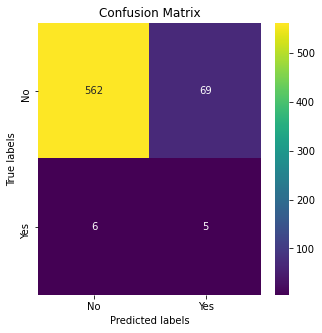

In [285]:
model_evaluation(log_grid_search)

              precision    recall  f1-score   support

          no       0.99      0.81      0.90       631
         yes       0.06      0.73      0.12        11

    accuracy                           0.81       642
   macro avg       0.53      0.77      0.51       642
weighted avg       0.98      0.81      0.88       642

Sensitivity: 0.727
Specificity: 0.815
PPV: 0.064
NPV: 0.994
The AUC is 0.854
The AUPRC is 0.129


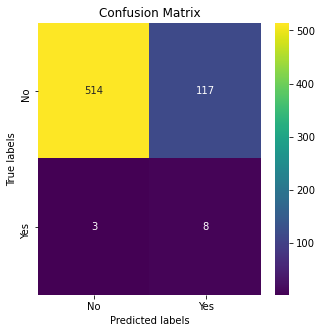

In [286]:
model_evaluation(rf_grid_search)

              precision    recall  f1-score   support

          no       0.99      0.98      0.98       631
         yes       0.21      0.27      0.24        11

    accuracy                           0.97       642
   macro avg       0.60      0.63      0.61       642
weighted avg       0.97      0.97      0.97       642

Sensitivity: 0.273
Specificity: 0.983
PPV: 0.214
NPV: 0.987
The AUC is 0.774
The AUPRC is 0.131


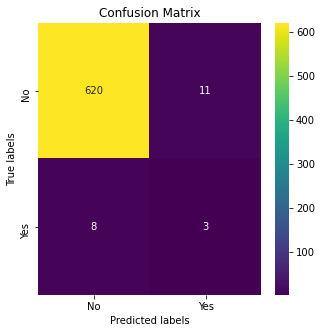

In [287]:
model_evaluation(xgb_grid_search)

              precision    recall  f1-score   support

          no       0.99      0.93      0.96       631
         yes       0.06      0.27      0.10        11

    accuracy                           0.92       642
   macro avg       0.52      0.60      0.53       642
weighted avg       0.97      0.92      0.94       642

Sensitivity: 0.273
Specificity: 0.929
PPV: 0.0625
NPV: 0.987
The AUC is 0.805
The AUPRC is 0.226


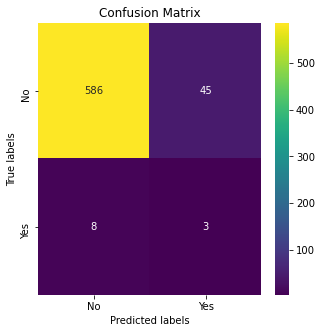

In [288]:
model_evaluation(ann_model)

              precision    recall  f1-score   support

          no       0.98      1.00      0.99       631
         yes       1.00      0.09      0.17        11

    accuracy                           0.98       642
   macro avg       0.99      0.55      0.58       642
weighted avg       0.98      0.98      0.98       642

Sensitivity: 0.0909
Specificity: 1
PPV: 1
NPV: 0.984
The AUC is 0.87
The AUPRC is 0.355


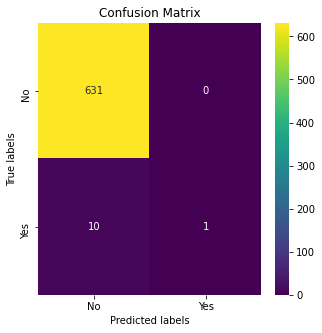

In [289]:
model_evaluation(voting_clf)

In [290]:
### Calculating Euroscore for Comparison ###

In [291]:
euro_data = data.loc[:]

# NYHA classes
euro_data.loc[euro_data['NYHA'] == 1, 'NYHA_euro'] = 0
euro_data.loc[euro_data['NYHA'] == 2, 'NYHA_euro'] = 0.0170545
euro_data.loc[euro_data['NYHA'] == 3, 'NYHA_euro'] = 0.2958358
euro_data.loc[euro_data['NYHA'] == 4, 'NYHA_euro'] = 0.5597929

# CCS stage 4
euro_data.loc[euro_data['CCS'] < 4, 'CCS_euro'] = 0
euro_data.loc[euro_data['CCS'] == 4, 'CCS_euro'] = 0.2226147

# IDDM
euro_data.loc[euro_data['DB_CON'] < 4, 'DB_euro'] = 0
euro_data.loc[euro_data['DB_CON'] < 4, 'DB_euro'] = 0.3542749

# Age
euro_data.loc[euro_data['AGE'] <= 60 , 'age_euro'] = 0
euro_data.loc[euro_data['AGE'] > 60, 'age_euro'] = (euro_data['AGE'] - 60) * 0.0285181

# Renal dysfunction
euro_data.loc[(euro_data['CrCl'] >= 50) & (euro_data['CrCl'] <= 85), 'renal_euro'] = 0.303553
euro_data.loc[euro_data['CrCl'] < 50, 'renal_euro'] = 0.8592256
euro_data.loc[euro_data['DIAL'] == 1, 'renal_euro'] = 0.6421508
euro_data.loc[euro_data['CrCl'] > 85, 'renal_euro'] = 0

# LV function
euro_data.loc[euro_data['EF_EST'] == 1, 'LVEF_euro'] = 0
euro_data.loc[euro_data['EF_EST'] == 2, 'LVEF_euro'] = 0
euro_data.loc[euro_data['EF_EST'] == 3, 'LVEF_euro'] = 0.3150652
euro_data.loc[euro_data['EF_EST'] == 4, 'LVEF_euro'] = 0.8084096
# very poor cardiac function is not reflected in the ANZSCTS database

# Chronic respiratory disease
euro_data.loc[euro_data['LD_T'] < 2, 'lung_euro'] = 0
euro_data.loc[euro_data['STAT'] >= 2, 'lung_euro'] = 0.1886564

# Urgency
euro_data.loc[euro_data['STAT'] == 1, 'urgency_euro'] = 0
euro_data.loc[euro_data['STAT'] == 2, 'urgency_euro'] = 0.3174673
euro_data.loc[euro_data['STAT'] == 3, 'urgency_euro'] = 0.7039121
euro_data.loc[euro_data['STAT'] == 4, 'urgency_euro'] = 1.362947

# Active endocarditis
euro_data.loc[euro_data['IE_T'] != 1, 'endocarditis_euro'] = 0
euro_data.loc[euro_data['IE_T'] == 1, 'endocarditis_euro'] = 0.6194522

# Shock or resus
euro_data.loc[(euro_data['SHOCK'] == 0) & (euro_data['RESUS'] == 0), 'critical_euro'] = 0
euro_data.loc[(euro_data['SHOCK'] == 1) | (euro_data['RESUS'] == 1), 'critical_euro'] = 1.086517

# Recent MI
# Euroscore recognises all MI < 90 days
# So all definitions of MI_W will count
euro_data.loc[euro_data['MI_W'] == 0, 'MI_euro'] = 0
euro_data.loc[euro_data['MI_W'] > 0, 'MI_euro'] = 0.1528943

## number of procedures ## multiple steps
euro_data.loc[euro_data['CCAB'] == 0, 'procedure_euro'] = 0.0062118 # not CABG surgery

# break down each valvular procedure into binary
euro_data['AOPROC'] = 0
euro_data['MIPROC'] = 0
euro_data['TRPROC'] = 0
euro_data.loc[euro_data['AOPROC_COMMON'] > 1, 'AOPROC'] = 1
euro_data.loc[euro_data['MIPROC_COMMON'] > 1, 'MIPROC'] = 1
euro_data.loc[euro_data['TRPROC_COMMON'] > 1, 'TRPROC'] = 1

# add up binary values
euro_data['num_procedures'] = euro_data['AOPROC']+euro_data['MIPROC']+euro_data['TRPROC']+euro_data['COTH']+euro_data['CCAB']

euro_data.loc[euro_data['num_procedures'] == 2, 'procedure_euro'] = 0.5521478
euro_data.loc[euro_data['num_procedures'] > 2, 'procedure_euro'] = 0.9724533

# MISSING IS
# neuromuscular mobility
# thoracic aorta

In [292]:
## final euroscore ##
from math import exp

euro_data['additions'] = (euro_data['NYHA_euro'] + 
                          euro_data['CCS_euro'] + 
                          euro_data['DB_euro'] +
                          euro_data['age_euro'] +
                          (euro_data['Sex']-1)*0.2196434 + # female coefficient, male is 0
                          euro_data['PVD']*0.5360268 +
                          euro_data['lung_euro'] +
                          euro_data['PCS']*1.118599 +
                          euro_data['renal_euro'] +
                          euro_data['endocarditis_euro'] +
                          euro_data['critical_euro'] +
                          euro_data['LVEF_euro'] +
                          euro_data['MI_euro'] +
                          euro_data['procedure_euro'] +
                          euro_data['urgency_euro'] +
                          
                          - 5.324537)

euro_data['additions'] = euro_data['additions'].fillna(- 5.324537)
euro_data['euroscore'] = np.exp(euro_data['additions']) / (1+np.exp(euro_data['additions']))

In [293]:
data['euroscore'] = euro_data['euroscore']
data['euroscore']*100

0       0.484700
1       1.156007
2       3.997225
3       0.484700
4       0.484700
          ...   
3479    0.484700
3480    1.594905
3481    1.338331
3482    1.334161
3484    0.705460
Name: euroscore, Length: 3208, dtype: float64

In [294]:
# Compare machine learning prediction to euroscore
roc_auc_score(y, data['euroscore'])

0.659013846899063

In [295]:
precision, recall, thresholds = precision_recall_curve(y, data['euroscore'])
auc(recall, precision)

0.0584609685407511

In [296]:
### AUSSCORE for comparison

# AusSCORE II in predicting 30-day mortality after isolated coronary
# artery bypass grafting in Australia and New Zealand
# Baki Billah, PhD,a Molla M. Huq, MSc,a Julian A. Smith, MBBS,b,c Fahim Sufi, PhD,d Lavinia Tran, PhD,a
# Gilbert C. Shardey, MBBS,e and Christopher M. Reid, PhDa
# The Journal of Thoracic and Cardiovascular Surgery 2014

aus_data = data.loc[:]

# need to exclude non isolated CABG cases
condition = (aus_data['CCAB'] == 1) & (aus_data['CVLV'] == 0) & (aus_data['AO'] == 0) & (aus_data['COTH'] == 0)

aus_data.loc[condition, 'iso_CABG'] = 1
aus_data['iso_CABG'] = aus_data['iso_CABG'].fillna(0)
aus_data['iso_CABG'].sum()

aus_data = aus_data[aus_data['iso_CABG'] == 1]

1769.0

In [297]:
# Age
aus_data.loc[aus_data['AGE'] < 70, 'aus_age'] = 0
aus_data.loc[(aus_data['AGE'] >= 70) & (aus_data['AGE'] < 80), 'aus_age'] = np.log(1.6)
aus_data.loc[(aus_data['AGE'] >= 80), 'aus_age'] = np.log(2.6)

# EF_EST
aus_data.loc[(aus_data['EF_EST'] <= 2 ), 'aus_EF'] = 0 # EF_EST 1-2 is >45%
aus_data.loc[(aus_data['EF_EST'] == 3 ), 'aus_EF'] = np.log(1.7) # EF_EST 3 is 30-45%
aus_data.loc[(aus_data['EF_EST'] == 4 ), 'aus_EF'] = np.log(3.6) # EF_EST 4 is < 30%

# Previous cardiac surgery
aus_data.loc[(aus_data['PCS'] == 0 ), 'aus_PCS'] = 0
aus_data.loc[(aus_data['PCS'] == 1 ), 'aus_PCS'] = np.log(2.3) 

# CrCl
aus_data.loc[(aus_data['CrCl'] >= 90), 'aus_CrCl'] = 0
aus_data.loc[(aus_data['CrCl'] >= 60) & (aus_data['CrCl'] < 90), 'aus_CrCl'] = np.log(1.5)
aus_data.loc[(aus_data['CrCl'] >= 30) & (aus_data['CrCl'] < 60), 'aus_CrCl'] = np.log(2.0)
aus_data.loc[(aus_data['CrCl'] < 30), 'aus_CrCl'] = np.log(3.8)

# Preoperative dialysis
aus_data.loc[(aus_data['DIAL'] == 0), 'aus_CrCl'] = 0
aus_data.loc[(aus_data['DIAL'] == 1), 'aus_CrCl'] = np.log(3.9)

# Surgical urgency
aus_data.loc[(aus_data['STAT'] == 1), 'aus_STAT'] = 0
aus_data.loc[(aus_data['STAT'] == 2), 'aus_STAT'] = np.log(1.1)
aus_data.loc[(aus_data['STAT'] == 3), 'aus_STAT'] = np.log(2.6)
aus_data.loc[(aus_data['STAT'] == 4), 'aus_STAT'] = np.log(2.6)

# NYHA
aus_data.loc[(aus_data['NYHA'] == 1), 'aus_NYHA'] = 0
aus_data.loc[(aus_data['NYHA'] == 2), 'aus_NYHA'] = 0
aus_data.loc[(aus_data['NYHA'] == 3), 'aus_NYHA'] = np.log(1.4)
aus_data.loc[(aus_data['NYHA'] == 4), 'aus_NYHA'] = np.log(1.8)

# Inotrope administration
aus_data.loc[(aus_data['MEDIN'] == 0), 'aus_inotrope'] = 0
aus_data.loc[(aus_data['MEDIN'] == 1), 'aus_inotrope'] = np.log(2.1)

# Peripheral vascular disease
aus_data.loc[(aus_data['PVD'] == 0), 'aus_PVD'] = 0
aus_data.loc[(aus_data['PVD'] == 1), 'aus_PVD'] = np.log(1.5)

# Previous MI
aus_data.loc[(aus_data['MI'] == 0), 'aus_MI'] = 0
aus_data.loc[(aus_data['MI'] == 1), 'aus_MI'] = np.log(1.5)

# Anticoagulant
aus_data.loc[(aus_data['MEDAC'] == 0), 'aus_anticoag'] = 0
aus_data.loc[(aus_data['MEDAC'] == 1), 'aus_anticoag'] = np.log(1.3)

# Gender
aus_data.loc[(aus_data['Sex'] == 1), 'aus_sex'] = 0 # 1 is male
aus_data.loc[(aus_data['Sex'] == 2), 'aus_sex'] = np.log(1.5) # 2 is female

# Cardiogenic shock
aus_data.loc[(aus_data['SHOCK'] == 0), 'aus_shock'] = 0
aus_data.loc[(aus_data['SHOCK'] == 1), 'aus_shock'] = np.log(1.8)

# IV nitrates
aus_data.loc[(aus_data['MEDNI'] == 0), 'aus_nitrates'] = 0
aus_data.loc[(aus_data['MEDNI'] == 1), 'aus_nitrates'] = np.log(1.5)

In [298]:
aus_data['ausscore_addition'] = (aus_data['aus_age'] + aus_data['aus_EF'] +
                              aus_data['aus_PCS'] + aus_data['aus_CrCl'] +
                              aus_data['aus_STAT'] + aus_data['aus_NYHA'] +
                              aus_data['aus_inotrope'] + aus_data['aus_PVD'] +
                              aus_data['aus_MI'] + aus_data['aus_anticoag'] +
                              aus_data['aus_sex'] + aus_data['aus_shock'] +
                              aus_data['aus_nitrates'])

aus_data['ausscore_total'] = np.exp(aus_data['ausscore_addition']) / (1 + np.exp(aus_data['ausscore_addition']))

In [299]:
# double check data
aus_data['ausscore_total']

3       0.692308
4       0.661017
6       0.797037
7       0.697885
9       0.759036
          ...   
2575    0.807969
2577    0.677419
2581    0.600000
2583    0.718310
2584    0.725275
Name: ausscore_total, Length: 1769, dtype: float64

In [300]:
# set outcome variable
y = aus_data['MORT30']

# check roc_auc
roc_auc_score(y, aus_data['ausscore_total'])

0.7619863013698629

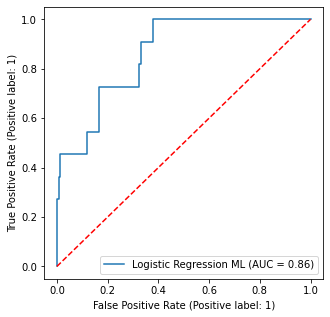

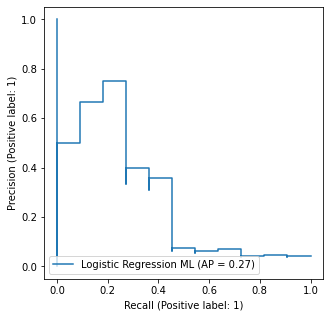

In [301]:
### Plotting Curves ###

model = log_grid_search

# fig = plot_roc_curve(model, X_test_prepared, y_test, name='EuroScore II')#, ax = fig.ax_)
fig = plot_roc_curve(model, X_test_prepared, y_test, name='Logistic Regression ML')#, ax = fig.ax_)
plt.plot([0,1], [0,1], color='red', linestyle='--')

plot_precision_recall_curve(model, X_test_prepared, y_test, name='Logistic Regression ML')